In [35]:
%matplotlib inline

from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 7]

## Load data:

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [15]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

columns = ['preg_count', 'glucose', 'BP', 'skin_thick', 'insulin', 'BMI', 'pedigree', 'age', 'class']

df = pd.read_csv(url, header=None)
df.columns = columns
df.head()

,preg_count,glucose,BP,skin_thick,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.dtypes

preg_count      int64
glucose         int64
BP              int64
skin_thick      int64
insulin         int64
BMI           float64
pedigree      float64
age             int64
class           int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   preg_count  768 non-null    int64  
 1   glucose     768 non-null    int64  
 2   BP          768 non-null    int64  
 3   skin_thick  768 non-null    int64  
 4   insulin     768 non-null    int64  
 5   BMI         768 non-null    float64
 6   pedigree    768 non-null    float64
 7   age         768 non-null    int64  
 8   class       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.memory_usage() # in bytes

Index          128
preg_count    6144
glucose       6144
BP            6144
skin_thick    6144
insulin       6144
BMI           6144
pedigree      6144
age           6144
class         6144
dtype: int64

In [19]:
df.memory_usage().sum()

55424

In [20]:
# To get statistics for all the columns at the same time
df.describe()

,preg_count,glucose,BP,skin_thick,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Statistical moments

1. Mean (1st moment)
2. Variance (2nd moment)
3. Skewness (3rd moment)
4. Kurtosis (4th moment)

In [22]:
# Applying mean() to the dataframe returns mean of each column (pandas series)
df.mean()

preg_count      3.845052
glucose       120.894531
BP             69.105469
skin_thick     20.536458
insulin        79.799479
BMI            31.992578
pedigree        0.471876
age            33.240885
class           0.348958
dtype: float64

In [23]:
df['BMI'].mean()

31.992578124999977

In [24]:
df['preg_count'].mean() # returns the mean of 'preg_count' column

3.8450520833333335

In [27]:
# variance
df.var()

preg_count       11.354056
glucose        1022.248314
BP              374.647271
skin_thick      254.473245
insulin       13281.180078
BMI              62.159984
pedigree          0.109779
age             138.303046
class             0.227483
dtype: float64

#### Skewness

Skewness is the measure of the symmetry of a distribution compared to standard normal distribution

 - +ive - right skewed (mean is to the right of mode/median). Long tail in the +ive direction.
 - 0 - symmetric
 - -ive - left skewed (mean is to the left of mode/median). Long tail in the -ive direction.

In [26]:
# skewness
df.skew()

preg_count    0.901674
glucose       0.173754
BP           -1.843608
skin_thick    0.109372
insulin       2.272251
BMI          -0.428982
pedigree      1.919911
age           1.129597
class         0.635017
dtype: float64

#### Kurtosis

Kurtosis is a measure of the flatness or peakedness of a distribution compared to the normal distribution.

 - +ive - Leptokurtosis (sharper/spikier peak compared to the normal dist.)
 - 0 - Mesokurtic (normal dist.)
 - -ive - Platykurtic (flatter peak compared to the normal dist.) eg. Uniform distribution

In [28]:
# skewness
df.kurtosis()

preg_count    0.159220
glucose       0.640780
BP            5.180157
skin_thick   -0.520072
insulin       7.214260
BMI           3.290443
pedigree      5.594954
age           0.643159
class        -1.600930
dtype: float64

#### min / max / median

In [29]:
# min of each column
df.min()

preg_count     0.000
glucose        0.000
BP             0.000
skin_thick     0.000
insulin        0.000
BMI            0.000
pedigree       0.078
age           21.000
class          0.000
dtype: float64

In [30]:
# max of each column
df.max()

preg_count     17.00
glucose       199.00
BP            122.00
skin_thick     99.00
insulin       846.00
BMI            67.10
pedigree        2.42
age            81.00
class           1.00
dtype: float64

In [31]:
# median of each column
df.median()

preg_count      3.0000
glucose       117.0000
BP             72.0000
skin_thick     23.0000
insulin        30.5000
BMI            32.0000
pedigree        0.3725
age            29.0000
class           0.0000
dtype: float64

#### Correlation

In [32]:
df.corr()

,preg_count,glucose,BP,skin_thick,insulin,BMI,pedigree,age,class
preg_count,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [45]:
import seaborn as sns

<AxesSubplot:>

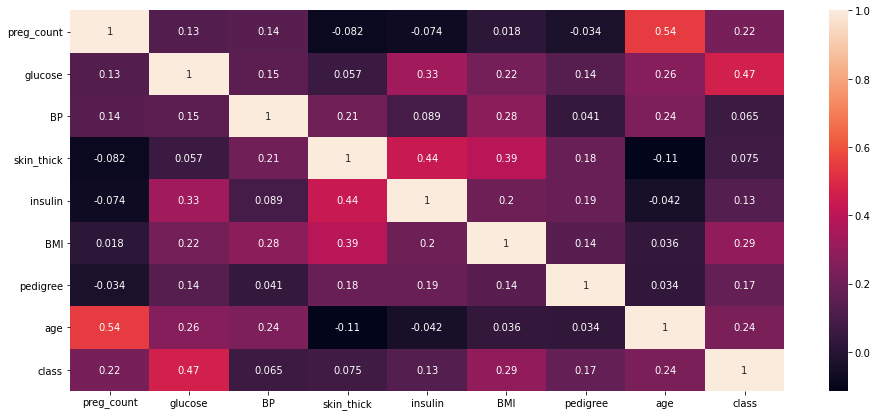

In [47]:
sns.heatmap(df.corr(), annot=True)

### Lineplot

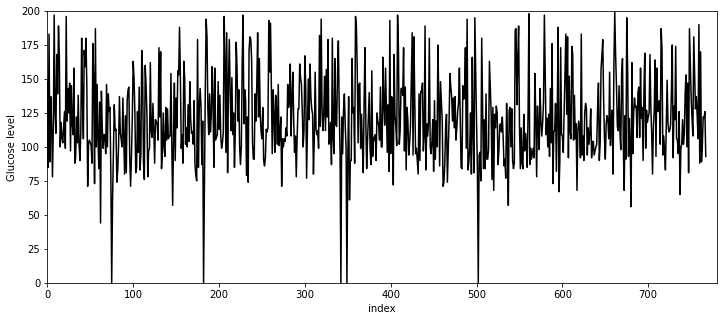

In [36]:
# Plotting with index along the x-axis
df['glucose'].plot(figsize=(12, 5), color='black') # color and figsize changed

plt.xlim(0, 780) # range for x-axis
plt.ylim(0, 200) # range for x-axis
plt.xlabel('index')
plt.ylabel('Glucose level'); # ";" prevents object info from displaying

### Scatterplot

<AxesSubplot:xlabel='age', ylabel='glucose'>

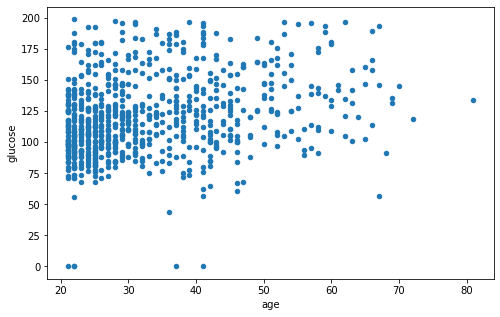

In [37]:
# plotting one variable against the other
df.plot.scatter('age', 'glucose', figsize=(8, 5))

# The x and y labels are automatically taken from the column names

### Boxplot

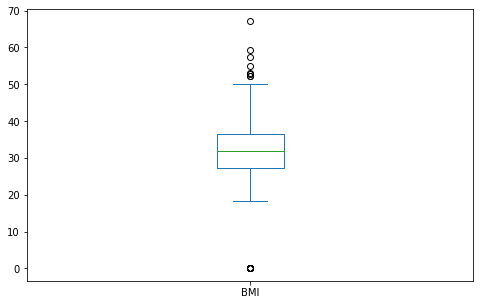

In [38]:
# Box plot of a column
df['BMI'].plot.box(figsize=(8, 5));

<AxesSubplot:>

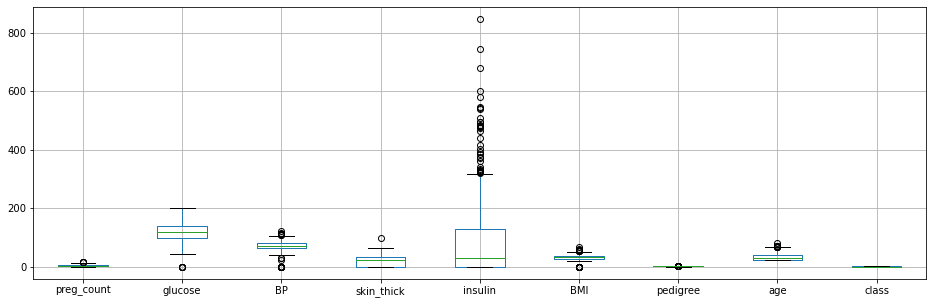

In [39]:
# Box plot of all the columns with numerical data
df.boxplot(figsize=(16, 5)) # or df.plot.box()

### Histogram

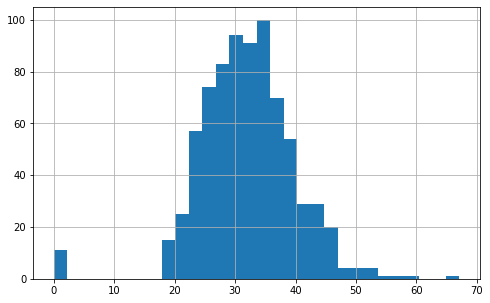

In [40]:
df['BMI'].hist(bins=30, figsize=(8, 5)); # we can specify the number of bins

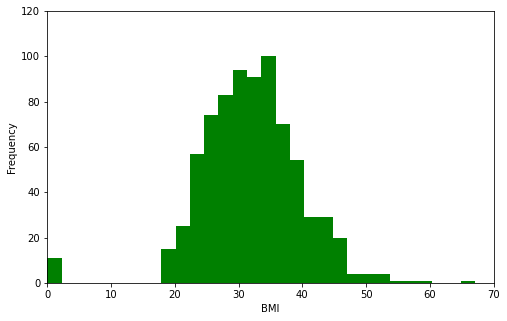

In [41]:
ax = df['BMI'].hist(bins=30, grid=False, color='green', figsize=(8, 5)) # grid turned off and color changed

ax.set_xlabel('BMI')
ax.set_ylabel('Frequency')

ax.set_xlim(0, 70) # limiting display range to 0-70 for the x-axis
ax.set_ylim(0, 120); # limiting display range to 0-120 for the y-axis

### Barplot
The bar charts are used to visualize categorical data (nominal or ordinal values) and the height shows the value it represents

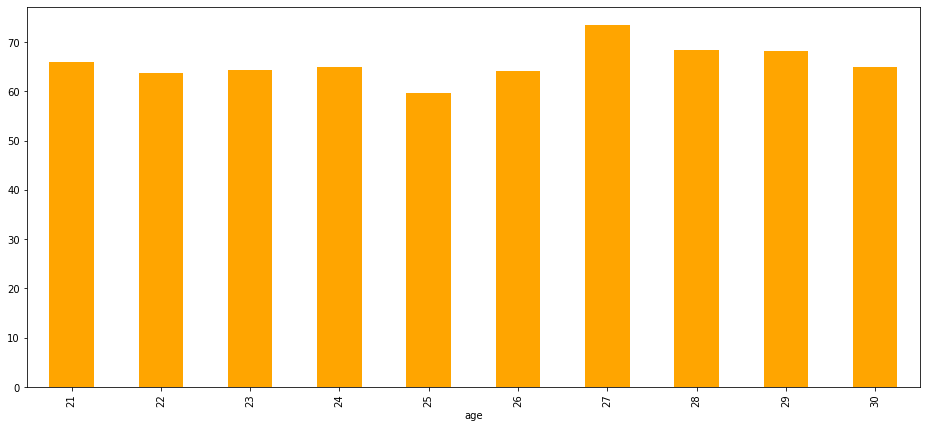

In [42]:
df_avg_BP = df.groupby('age')['BP'].mean()
df_avg_BP[:10].plot.bar(color='orange');

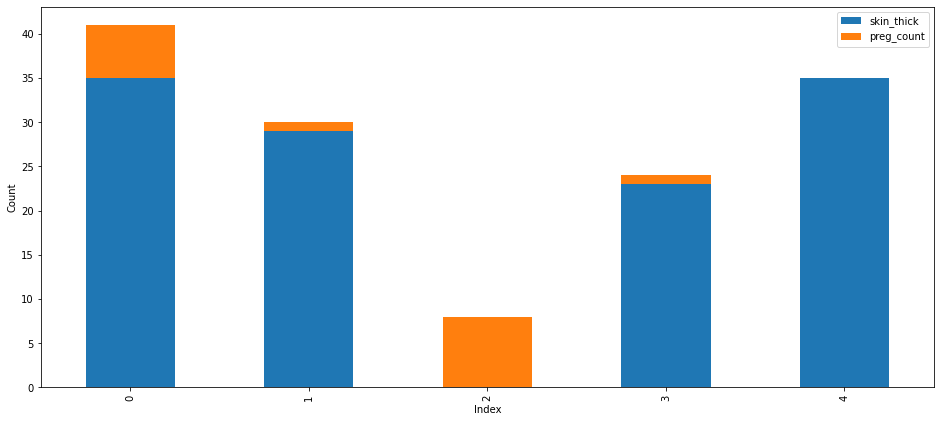

In [43]:
# To stack values from multiple columns
ax = df[['skin_thick', 'preg_count']][:5].plot.bar(stacked=True)

ax.set_xlabel("Index")
ax.set_ylabel("Count");

### Multiple Plots

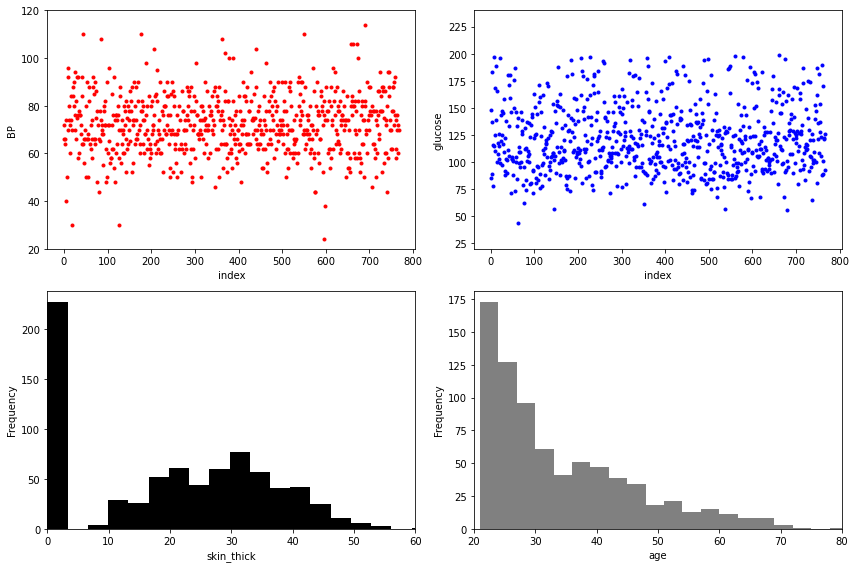

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# or fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, figsize=(12, 8))

# axes is the axes object(s). It can be a single object or an array of objects. 
# In this case, it is an array of dimension 2-by-2

df['BP'].plot(ax = axes[0][0], style='.', color='red') # top left
df['glucose'].plot(ax = axes[0][1], style='.', color='blue') # top right

df['skin_thick'].plot.hist(bins=30, ax = axes[1][0], color='black') # bottom left
df['age'].plot.hist(bins=20, ax = axes[1][1], color='gray') # bottom right

axes[0][0].set_xlabel('index')
axes[0][1].set_xlabel('index')
axes[1][0].set_xlabel('skin_thick')
axes[1][1].set_xlabel('age')

axes[0][0].set_ylabel('BP')
axes[0][1].set_ylabel('glucose')

axes[0][0].set_ylim(20, 120)
axes[0][1].set_ylim(20, 240)

axes[1][0].set_xlim(0, 60)
axes[1][1].set_xlim(20, 80)

fig.tight_layout()

### Data cleansing

Unclean data renders only useless and inaccurate models. Garbage-in, garbage-out (GIGO)

It is meaningless to spend any time in modeling, if your data is not clean. Data cleaning is the most important task in the entire predicive modeling work flow. Clean data is critical for training models to achieve good predictive power.

Data scientists usually spend 70% of their time in understanding and cleaning the data which shows the seriousness of the task among data scientists. On contrary to the common misconception that modeling is the most time consuming task, it just involves 30% of the work.

Data integrity is questionable when any of the following exists in the data

    Missing values (NaNs),
    Infinite values,
    Outliers,
    Erroneous values, and
    Values in different format.

For each type, we need to apply suitable method(s) to clean the data. Let's discuss different methods and techniques to clean the data.

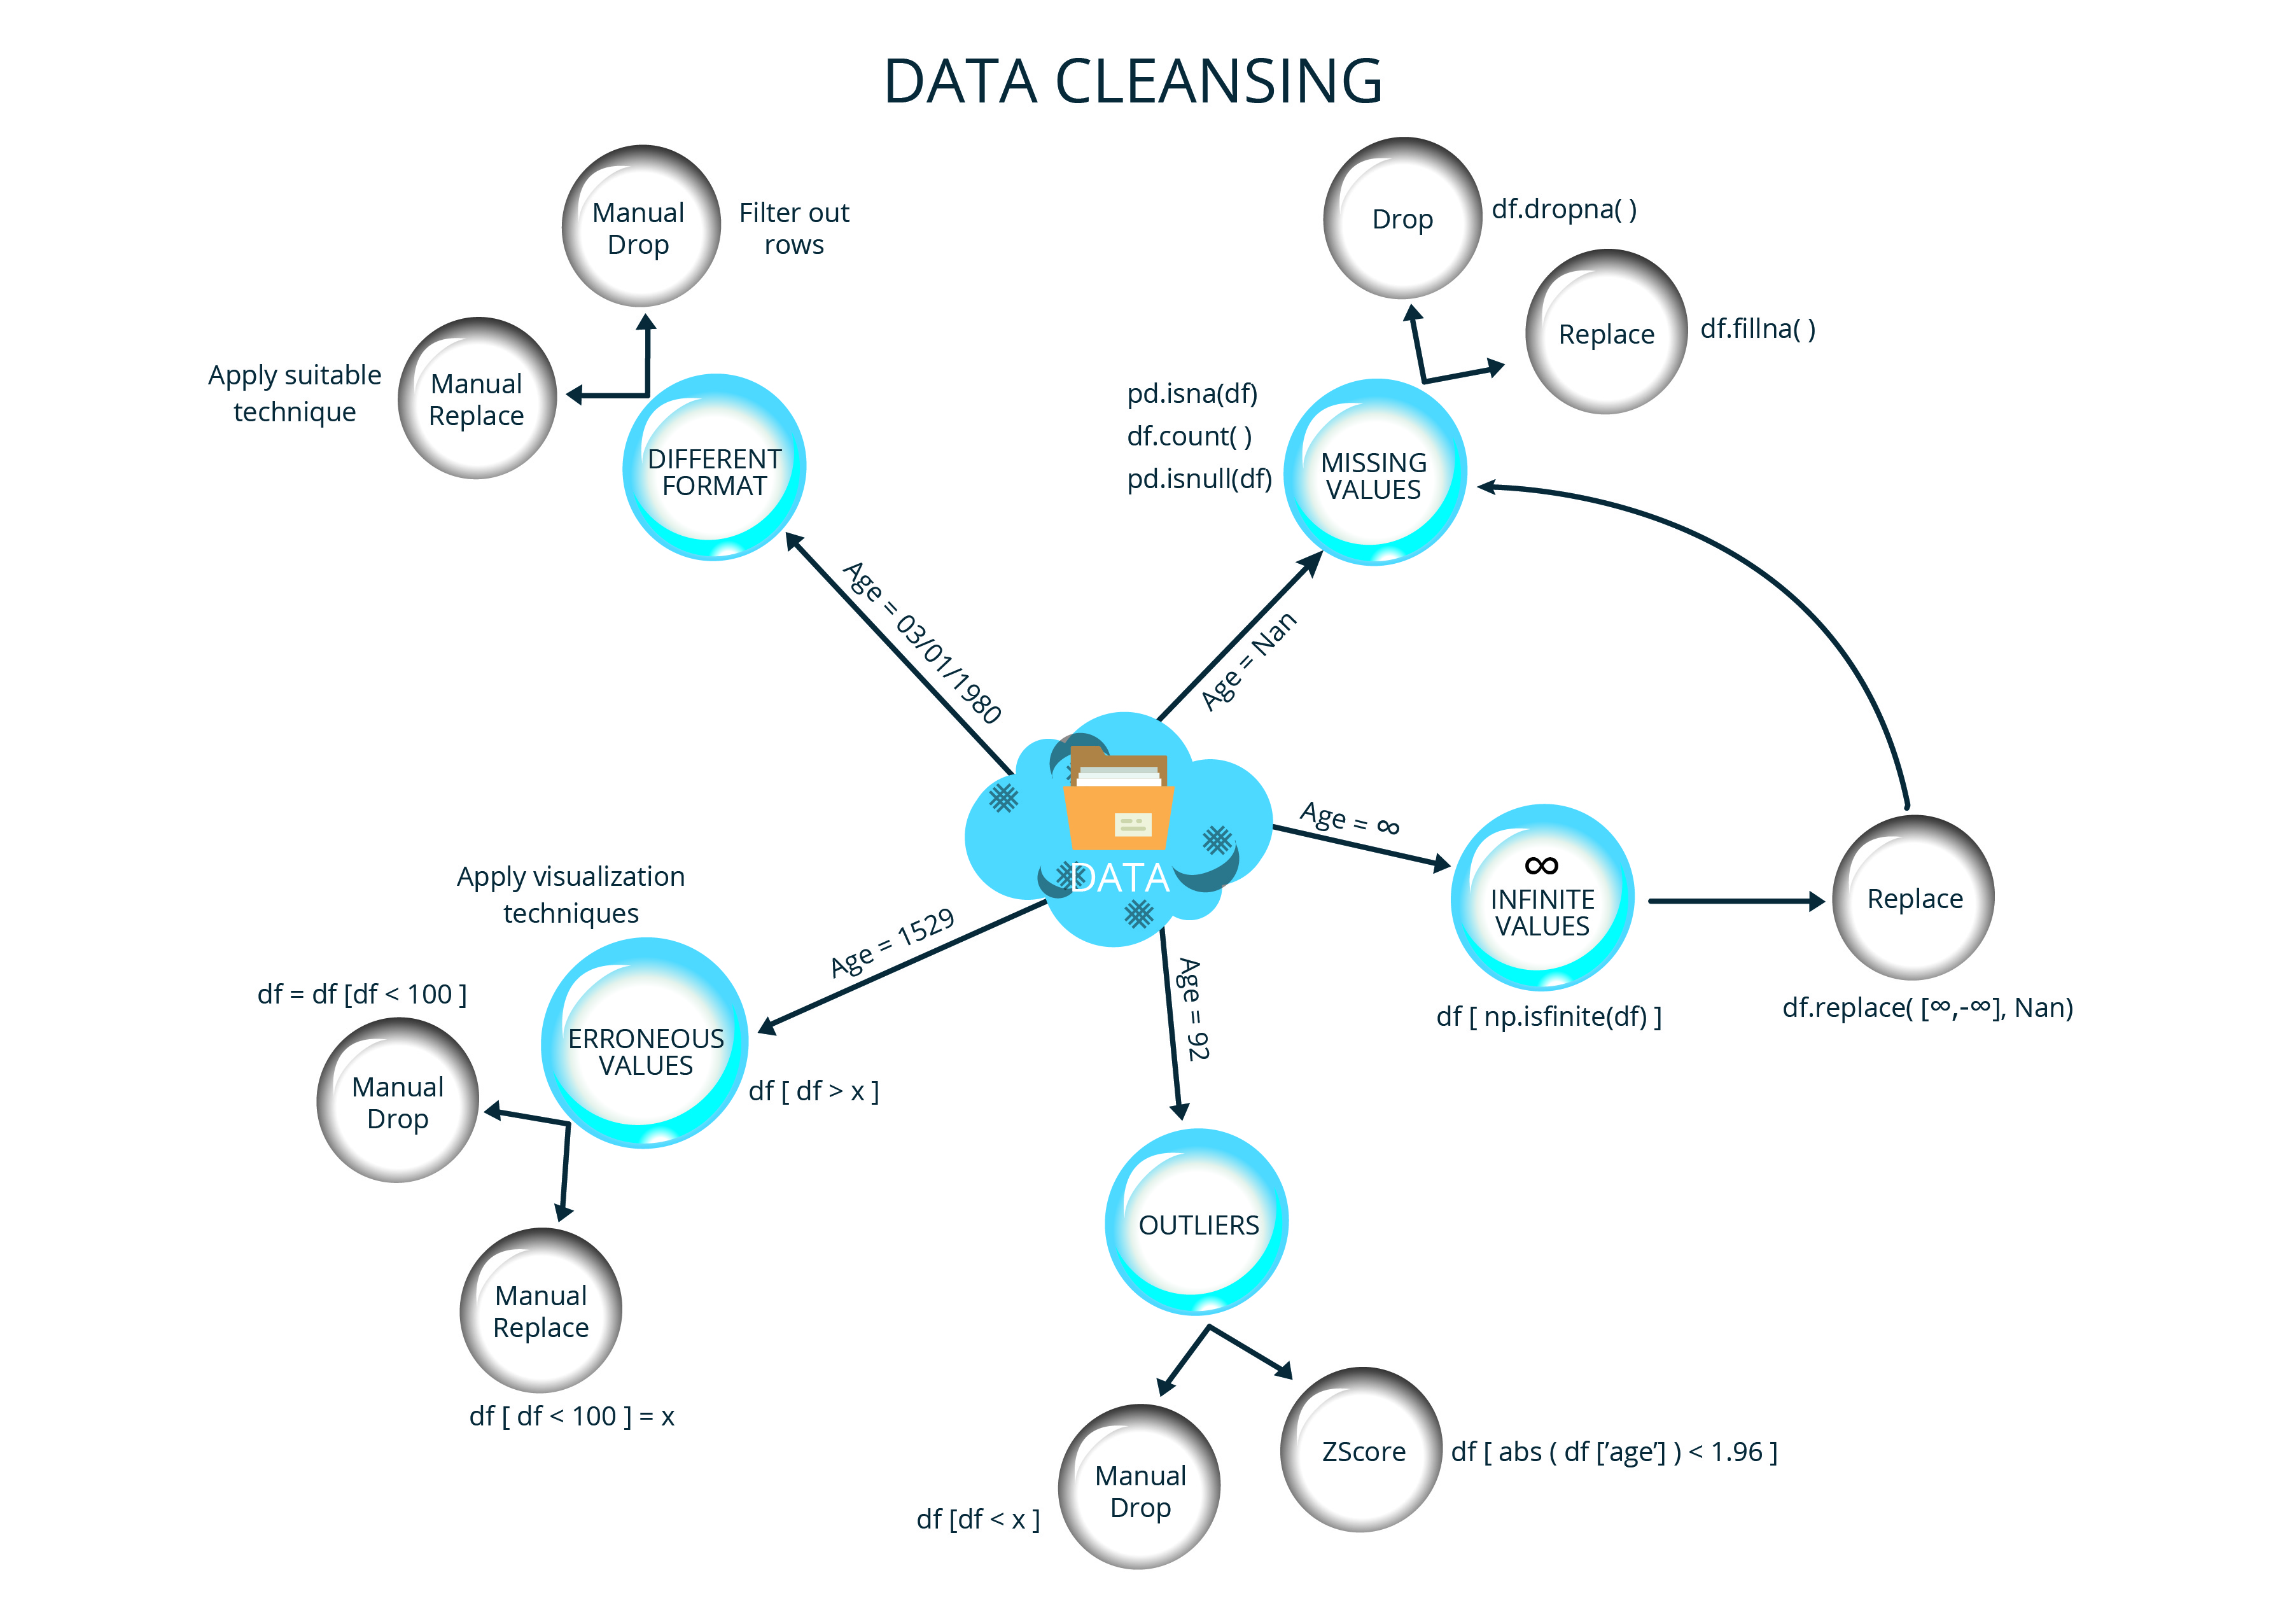